In [41]:
import tensorflow as tf
import imageio
import glob
import matplotlib.pyplot as plt
import numpy as np
import os,time

In [42]:
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 784).astype('float32')
train_images  = (train_images-127.5)/127.5

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, LeakyReLU, Flatten, Conv2DTranspose, Reshape,InputLayer,Dropout

In [44]:
randomDim = 100


In [45]:
generator = Sequential()
generator.add(InputLayer(randomDim))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha = 0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha = 0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha = 0.2))
generator.add(Dense(784, activation = 'tanh'))

In [46]:
discriminator = Sequential()
discriminator.add(InputLayer(784))
discriminator.add(Dense(1024))
discriminator.add(LeakyReLU(alpha = 0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha = 0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha = 0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid'))

In [47]:
# discriminator.trainable = False
ganInput = Input(randomDim)
x =  generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs = ganInput, outputs = ganOutput)


In [48]:
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')
gan.compile(loss = "binary_crossentropy", optimizer = 'adam')

In [53]:
def train_gan(epochs = 1, batchSize = 256):
    batchCount = int(train_images.shape[0] / batchSize)
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)
    dlosses = []
    glosses = []
    for e in range(1,epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for i in range(batchCount):
            if i%100 == 0:
                print("Iteration:",i)
            noise = np.random.normal(0,1,size = [batchSize,randomDim])
            dataBatch = train_images[np.random.randint(0,train_images.shape[0],size = batchSize)]

            generatedImages = generator.predict(noise)
            X = np.concatenate([dataBatch,generatedImages])
            yDis = np.zeros(2*batchSize)
            yDis[:batchSize] = 0.9
            # Discriminiator Training
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X,y = yDis)
            #Generator Training
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)   
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)
            # Record Losses
        print(dloss, gloss)
        dlosses.append(dloss)
        glosses.append(gloss)
    return (dlosses, glosses) 
    # if e == 1 or e % 4 == 0:
    #     saveGeneratedImages(e)

In [50]:
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

In [51]:
def saveGeneratedImages(epoch, examples=100, dim=(10, 10),figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='bilinear',
        cmap='gray_r')
        plt.axis('off')
        plt.tight_layout()
        # plt.savefig('images/gan_generated_image_epoch_%d.png' % epoch)

In [ ]:
dlosses, glosses = train_gan(epochs = 100)

Epochs: 100
Batch size: 256
Batches per epoch: 234
--------------- Epoch 1 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 2 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 3 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 4 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 5 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 6 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 7 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 8 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 9 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 10 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 11 ---------------
Iteration: 0
Iteration: 100
Iteration: 200
--------------- Epoch 12 ---------

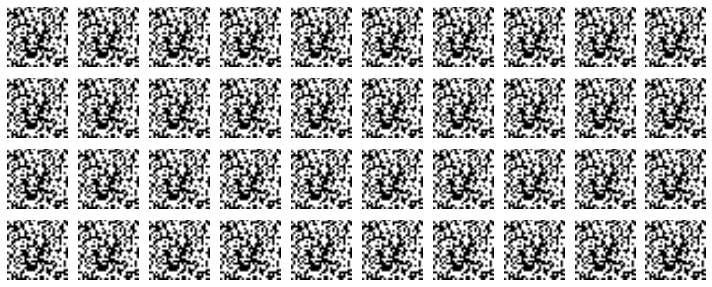

In [37]:
saveGeneratedImages(1, examples = 40)

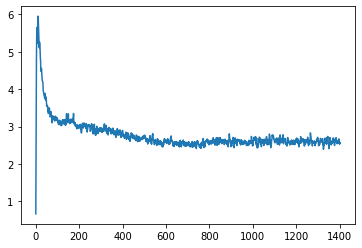

In [38]:
plt.plot(dlosses)

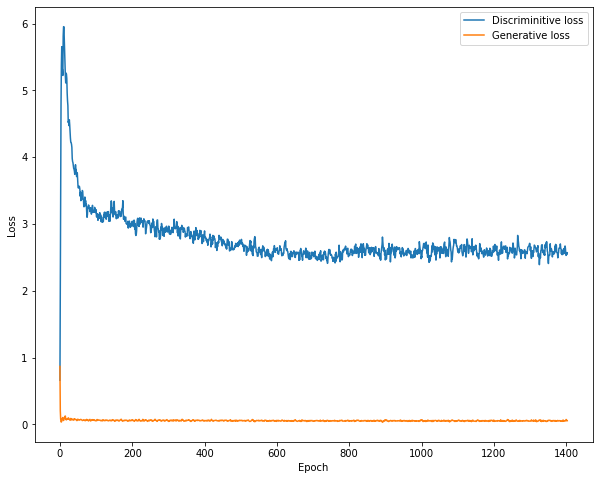

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(dlosses, label='Discriminitive loss')
plt.plot(glosses, label='Generative loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()